# Classification Model using SVM 

In [51]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from sklearn import svm

In [52]:
spike_data = np.loadtxt('/content/DataSetCoursework_DHA.txt')
n,m = spike_data.shape
spikes = spike_data[:,0:m-1]
trial_num = np.zeros((n, 1))
trial_num = spike_data[:,m-1]

print(spikes)
print(trial_num)

[[0. 0. 0. ... 0. 0. 4.]
 [0. 0. 0. ... 0. 0. 4.]
 [0. 0. 0. ... 0. 0. 4.]
 ...
 [0. 0. 0. ... 0. 0. 4.]
 [0. 0. 0. ... 0. 0. 4.]
 [0. 0. 0. ... 0. 0. 4.]]
[ 1.  1.  1. ... 20. 20. 20.]


In [53]:

X = spikes
y = trial_num

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
import pandas as pd
from sklearn import svm
clf = svm.SVC(C=2, kernel='linear')

In [55]:
print(clf)

SVC(C=2, kernel='linear')


In [56]:
#Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

In [57]:
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

         1.0       0.21      0.98      0.34        46
         2.0       0.00      0.00      0.00        21
         3.0       0.00      0.00      0.00        21
         4.0       0.00      0.00      0.00        71
         5.0       0.15      0.93      0.25        56
         6.0       0.00      0.00      0.00        25
         7.0       0.00      0.00      0.00        24
         8.0       0.00      0.00      0.00        22
         9.0       0.00      0.00      0.00        38
        10.0       0.00      0.00      0.00        31
        11.0       1.00      1.00      1.00        37
        12.0       0.25      0.07      0.12        40
        13.0       0.33      0.07      0.12        27
        14.0       0.00      0.00      0.00        28
        15.0       0.00      0.00      0.00         8
        16.0       0.00      0.00      0.00        13
        17.0       0.00      0.00      0.00        17
        18.0       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


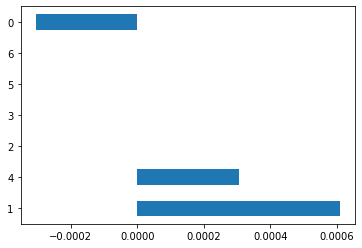

In [58]:

feature_importances = pd.Series(SVM.coef_[0])
feature_importances.nlargest(10).plot(kind='barh')
 

In [59]:
TestingDataResults=pd.DataFrame(data=X_test)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Prediction']=prediction
TestingDataResults.head()

,0,1,2,3,4,5,6,TargetColumn,Prediction
0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,8.0
1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,5.0
2,0.0,0.0,0.0,0.0,1.0,0.0,3.0,4.0,5.0
3,0.0,0.0,0.0,0.0,0.0,0.0,3.0,13.0,5.0
4,0.0,0.0,0.0,0.0,0.0,0.0,3.0,9.0,5.0


# NEURAL NETWORK OPTIMIZATION AND VALIDATION

In [60]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [61]:
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 16)                128       
                                                                 
 dense_12 (Dense)            (None, 16)                272       
                                                                 
 dense_13 (Dense)            (None, 1)                 17        
                                                                 
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [63]:
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X,
                    y,
                    callbacks=[es],
                    epochs=80, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Epoch 1/80
258/258 [==============================] - 1s 3ms/step - loss: -12.7804 - accuracy: 0.0636 - val_loss: -122.7086 - val_accuracy: 0.0000e+00
Epoch 2/80
258/258 [==============================] - 1s 2ms/step - loss: -257.5187 - accuracy: 0.0710 - val_loss: -1590.1790 - val_accuracy: 0.0000e+00
Epoch 3/80
258/258 [==============================] - 1s 2ms/step - loss: -1425.5883 - accuracy: 0.0710 - val_loss: -6279.5063 - val_accuracy: 0.0000e+00
Epoch 4/80
258/258 [==============================] - 1s 2ms/step - loss: -4100.2124 - accuracy: 0.0710 - val_loss: -15285.5654 - val_accuracy: 0.0000e+00
Epoch 5/80
258/258 [==============================] - 1s 2ms/step - loss: -8704.6787 - accuracy: 0.0710 - val_loss: -29829.8574 - val_accuracy: 0.0000e+00
Epoch 6/80
258/258 [==============================] - 1s 2ms/step - loss: -15751.5859 - accuracy: 0.0710 - val_loss: -50886.9883 - val_accuracy: 0.0000e+00
Epoch 7/80
258/258 [==============================] - 1s 2ms/step - loss: -2

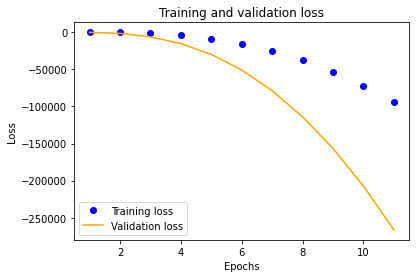

In [64]:
history_dict = history.history
# Learning curve(Loss)
# let's see the training and validation loss by epoch

# loss
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1) 

# plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

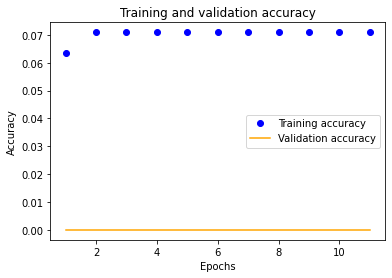

0.0

In [65]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# this is the max value - should correspond to
# the HIGHEST train accuracy
np.max(val_acc)

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# see how these are numbers between 0 and 1? 
model.predict(X) # prob of successes (survival)
np.round(model.predict(X),0) # 1 and 0 (survival or not)
y # 1 and 0 (survival or not)

# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
preds = np.round(model.predict(X),0)

# confusion matrix
print(confusion_matrix(y, preds)) # order matters! (actual, predicted)

## array([[490,  59],   ([[TN, FP],
##       [105, 235]])     [Fn, TP]])

print(classification_report(y, preds))

101/101 [==============================] - 0s 1ms/step
[[183   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [ 79   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [ 84   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [315   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [299   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [134   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [124   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [ 97   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [174   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [144   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [225   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [199   0 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Neural Network in Python (Regression)

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Neural Net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# use minMax scaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

(2579, 7) (645, 7) (2579,) (645,)


In [68]:
# build the model!
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1000)              8000      
                                                                 
 dense_15 (Dense)            (None, 500)               500500    
                                                                 
 dense_16 (Dense)            (None, 250)               125250    
                                                                 
 dense_17 (Dense)            (None, 1)                 251       
                                                                 
Total params: 634,001
Trainable params: 634,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
52/52 [==============================] - 2s 17ms/step - loss: 44.5322 - mae: 5.5323 - val_loss: 33.7846 - val_mae: 5.0563
Epoch 2/5000
52/52 [=========================

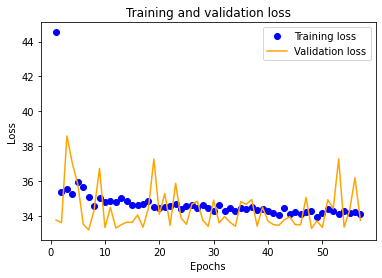

In [86]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [91]:
from keras.layers import Dense, Dropout

# Insert the dropout layer
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1000)              8000      
                                                                 
 dropout_6 (Dropout)         (None, 1000)              0         
                                                                 
 dense_23 (Dense)            (None, 500)               500500    
                                                                 
 dropout_7 (Dropout)         (None, 500)               0         
                                                                 
 dense_24 (Dense)            (None, 250)               125250    
                                                                 
 dropout_8 (Dropout)         (None, 250)               0         
                                                                 
 dense_25 (Dense)            (None, 1)                

In [92]:
x_train, x_test, y_train, y_test = train_test_split(
     X, y, test_size=8, random_state=0 )

In [93]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [94]:
model = LinearRegression().fit(x_train, y_train)
model.intercept_

11.711494592853413

In [95]:
model.coef_

array([-1.78694786, -1.94986183,  0.80538642,  3.55166158, -0.07670776,
       -0.37369733, -0.42984613])

In [96]:
model.score(x_train, y_train)

0.009321667146244272

In [97]:
model.score(x_test, y_test)

0.03230203655485586

In [98]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [99]:
X, y = load_boston(return_X_y=True)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [100]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=0).fit(x_train, y_train)
model.score(x_train, y_train)

0.01360155721592815

In [101]:
model.score(x_test, y_test)

0.03393541334664052

In [102]:

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0).fit(x_train, y_train)
model.score(x_train, y_train)

0.013504593319238034

In [103]:
model.score(x_test, y_test)

0.03061921195933981

# GENERAL LINEAR REGRESSION MODEL

In [109]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [110]:
# @title Plotting Functions

def plot_weights(models, sharey=True):
  """Draw a stem plot of weights for each model in models dict."""
  n = len(models)
  f = plt.figure(figsize=(10, 2.5 * n))
  axs = f.subplots(n, sharex=True, sharey=sharey)
  axs = np.atleast_1d(axs)

  for ax, (title, model) in zip(axs, models.items()):

    ax.margins(x=.02)
    stem = ax.stem(model.coef_.squeeze(), use_line_collection=True)
    stem[0].set_marker(".")
    stem[0].set_color(".2")
    stem[1].set_linewidths(.5)
    stem[1].set_color(".2")
    stem[2].set_visible(False)
    ax.axhline(0, color="C3", lw=3)
    ax.set(ylabel="Weight", title=title)
  ax.set(xlabel="Neuron (a.k.a. feature)")
  f.tight_layout()


def plot_function(f, name, var, points=(-10, 10)):
    """Evaluate f() on linear space between points and plot.

    Args:
      f (callable): function that maps scalar -> scalar
      name (string): Function name for axis labels
      var (string): Variable name for axis labels.
      points (tuple): Args for np.linspace to create eval grid.
    """
    x = np.linspace(*points)
    ax = plt.figure().subplots()
    ax.plot(x, f(x))
    ax.set(
      xlabel=f'${var}$',
      ylabel=f'${name}({var})$'
    )


def plot_model_selection(C_values, accuracies):
  """Plot the accuracy curve over log-spaced C values."""
  ax = plt.figure().subplots()
  ax.set_xscale("log")
  ax.plot(C_values, accuracies, marker="o")
  best_C = C_values[np.argmax(accuracies)]
  ax.set(
      xticks=C_values,
      xlabel="$C$",
      ylabel="Cross-validated accuracy",
      title=f"Best C: {best_C:1g} ({np.max(accuracies):.2%})",
  )

def plot_non_zero_coefs(C_values, non_zero_l1, n_voxels):
  """Plot the accuracy curve over log-spaced C values."""
  ax = plt.figure().subplots()
  ax.set_xscale("log")
  ax.plot(C_values, non_zero_l1, marker="o")
  ax.set(
    xticks=C_values,
    xlabel="$C$",
    ylabel="Number of non-zero coefficients",
  )
  ax.axhline(n_voxels, color=".1", linestyle=":")
  ax.annotate("Total\n# Neurons", (C_values[0], n_voxels * .98), va="top")

In [105]:
spike_data = np.loadtxt('/content/DataSetCoursework_DHA.txt')
n,m = spike_data.shape
spikes = spike_data[:,0:m-1]
trial_num = np.zeros((n, 1))
trial_num = spike_data[:,m-1]



In [111]:
X = spikes
y = trial_num

In [112]:
# Define the model
log_reg = LogisticRegression(penalty="none")

# Fit it to data
log_reg.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none')

In [113]:
y_pred = log_reg.predict(X)

In [114]:

def compute_accuracy(X, y, model):
  """Compute accuracy of classifier predictions.
  Args:
    X (2D array): Data matrix
    y (1D array): Label vector
    model (sklearn estimator): Classifier with trained weights.
  Returns:
    accuracy (float): Proportion of correct predictions.
  """

  y_pred = model.predict(X)

  accuracy = (y == y_pred).mean()

  return accuracy


# Compute train accuracy
train_accuracy = compute_accuracy(X, y, log_reg)
print(f"Accuracy on the training data: {train_accuracy:.2%}")

Accuracy on the training data: 23.45%


In [115]:
accuracies = cross_val_score(LogisticRegression(penalty='none'), X, y, cv=8)  # k=8 cross validation

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

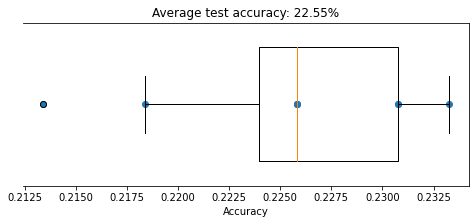

In [116]:
#@title
#@markdown Run to plot out these `k=8` accuracy scores.
f, ax = plt.subplots(figsize=(8, 3))
ax.boxplot(accuracies, vert=False, widths=.7)
ax.scatter(accuracies, np.ones(8))
ax.set(
  xlabel="Accuracy",
  yticks=[],
  title=f"Average test accuracy: {accuracies.mean():.2%}"
)
ax.spines["left"].set_visible(False)

In [117]:
X.shape

(3224, 7)

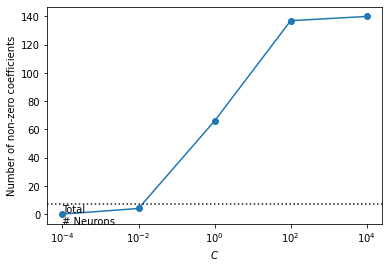

In [120]:
def count_non_zero_coefs(X, y, C_values):
  """Fit models with different L1 penalty values and count non-zero coefficients.
  Args:
    X (2D array): Data matrix
    y (1D array): Label vector
    C_values (1D array): List of hyperparameter values
  Returns:
    non_zero_coefs (list): number of coefficients in each model that are nonzero
  """
  non_zero_coefs = []
  for C in C_values:

    # Initialize and fit the model
    # (Hint, you may need to set max_iter)
    model = LogisticRegression(penalty="l1", C=C, solver="saga", max_iter=5000)
    model.fit(X,y)

    # Get the coefs of the fit model (in sklearn, we can do this using model.coef_)
    coefs = model.coef_

    # Count the number of non-zero elements in coefs
    non_zero = np.sum(coefs != 0)
    non_zero_coefs.append(non_zero)

  return non_zero_coefs


# Use log-spaced values for C
C_values = np.logspace(-4, 4, 5)

# Count non zero coefficients
non_zero_l1 = count_non_zero_coefs(X, y, C_values)

# Visualize
#with plt.xkcd():
plot_non_zero_coefs(C_values, non_zero_l1, n_voxels=X.shape[1])